LECTURE 4 ASSIGNMENT- Rashid D. Rodriguez CIS 1203

Read about (Susanna Epp pp. 704):

<br>1.Kruskal's Algorithm
<br>2.Prim's Algorithm
<br>3.Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

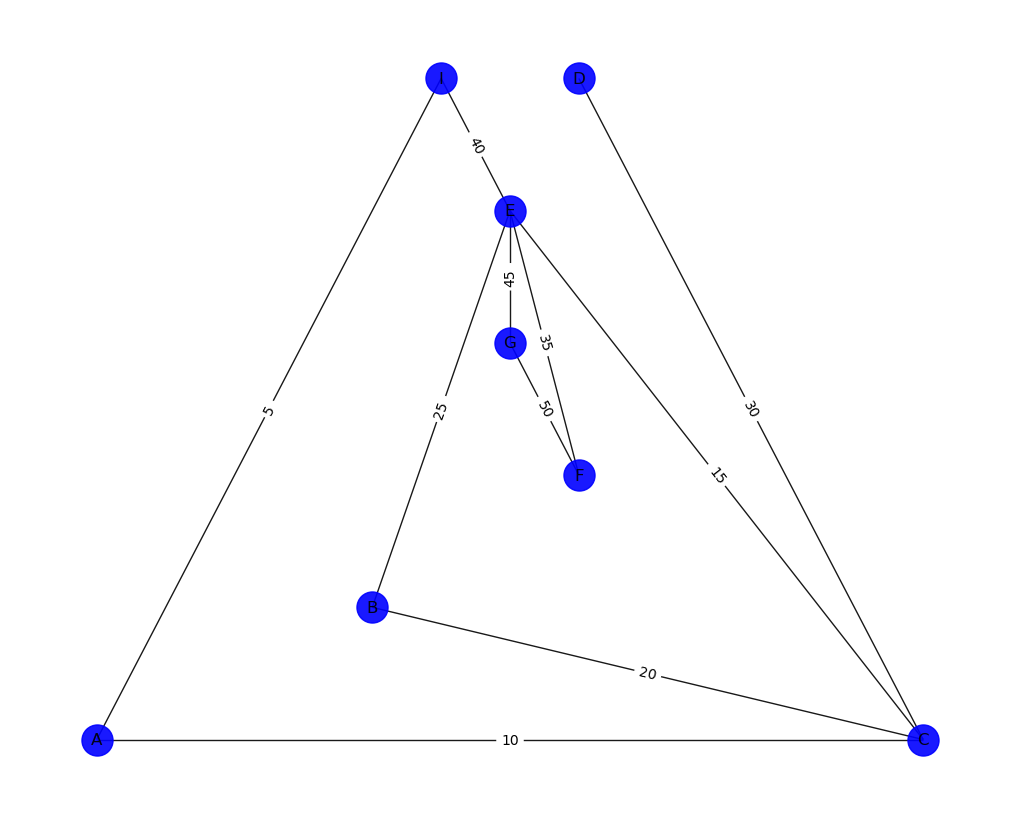

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
G = nx.Graph()

# Add nodes and edges to the graph
nodes = ["A", "B", "C", "D", "E", "F", "G"]
edges = [
    ("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"),
    ("C", "D"), ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")
]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define the positions of the nodes for plotting
pos = nx.planar_layout(G)

# Draw the graph
plt.figure(figsize=(10, 8))

# Draw nodes
nx.draw(
    G, pos=pos, with_labels=True,
    node_size=500, node_color='blue', alpha=0.9
)

# Draw edges with labels
edge_labels = {
    ("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15,
    ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35,
    ("F", "G"): 50, ("G", "E"): 45
}
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_color='black'
)

plt.show()


**1. Kruskals Algorithm**


Output: T [T is a minimum spanning tree for G.]Given an input graph G, which is a connected weighted graph with n vertices, where n is a positive integer, the algorithm aims to construct a subgraph T of G. This subgraph T includes all the vertices of G and edges are added in ascending order of weight. Throughout the process, the number of edges in T is denoted as m.

Here's the algorithm:

Start with T containing all vertices of G and no edges.
Initialize E as the set of all edges of G, and set m to 0.
<br>While the number of edges in T is less than n - 1:
<br>a. Find the edge e in E with the minimum weight.
<br>b. Remove e from E.
<br>c. If adding e to the edge set of T does not form a cycle, include e in T and increment m by 1.


<br>Output: T, which represents a minimum spanning tree for G.


**implementation:**

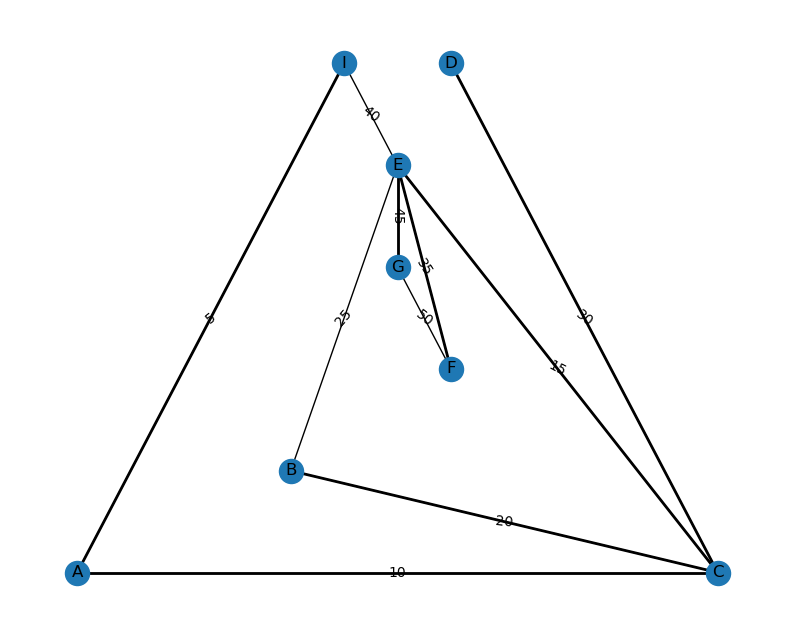

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the Disjoint Set class for Kruskal's algorithm
class DisjointSet:
    def __init__(self, vertices):
        self.parent = {vertex: vertex for vertex in vertices}
        self.rank = {vertex: 0 for vertex in vertices}

    def find(self, vertex):
        if self.parent[vertex] != vertex:
            self.parent[vertex] = self.find(self.parent[vertex])
        return self.parent[vertex]

    def union(self, vertex1, vertex2):
        root1 = self.find(vertex1)
        root2 = self.find(vertex2)
        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

# Define the function for Kruskal's algorithm
def kruskal(graph):
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    vertices = set(graph.nodes)
    minimum_spanning_tree = nx.Graph()
    disjoint_set = DisjointSet(vertices)

    for edge in edges:
        u, v, weight = edge
        if disjoint_set.find(u) != disjoint_set.find(v):
            disjoint_set.union(u, v)
            minimum_spanning_tree.add_edge(u, v, weight=weight['weight'])

    return minimum_spanning_tree

# Create the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {'weight': 10}), ("A", "I", {'weight': 5}), ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}), ("C", "D", {'weight': 30}), ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}), ("E", "F", {'weight': 35}), ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
G.add_edges_from(edgelist)

# Calculate the minimum spanning tree using Kruskal's algorithm
minimum_spanning_tree = kruskal(G)

# Plot the graph and minimum spanning tree
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)

# Draw the original graph with edge weights
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='black')
nx.draw(G, pos=pos, with_labels=True)

# Draw the minimum spanning tree
nx.draw_networkx_edges(minimum_spanning_tree, pos=pos, edge_color='black', width=2)

# Show the plot
plt.show()



**2. Prim's Algorithm**

**implementation:**

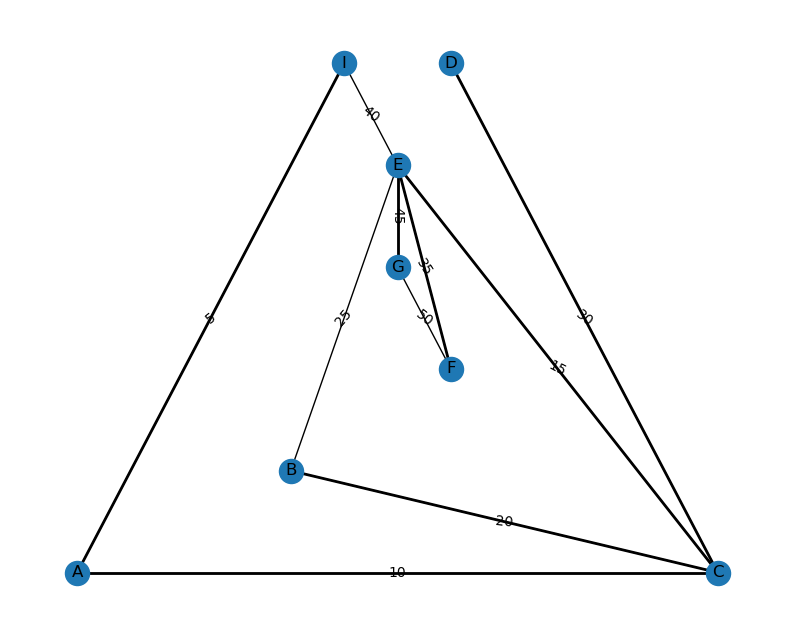

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

def prim(graph):
    """
    Function to find the minimum spanning tree of a graph using Prim's algorithm.
    """
    # Initialize an empty graph for the minimum spanning tree
    T = nx.Graph()
    # Choose an initial vertex arbitrarily
    initial_vertex = list(graph.nodes())[0]
    T.add_node(initial_vertex)  
    # Set of vertices not yet included in the minimum spanning tree
    V = set(graph.nodes()) - {initial_vertex} 

    # Iterate until all vertices are included in the minimum spanning tree
    for _ in range(len(graph.nodes()) - 1):
        # Initialize variables to track the minimum weight and edge
        min_weight = float('inf')
        min_edge = None

        # Iterate over vertices in the minimum spanning tree and vertices not yet included
        for u in T.nodes():
            for v in V:
                # Check if there is an edge between u and v and it has minimum weight so far
                if graph.has_edge(u, v) and graph[u][v]['weight'] < min_weight:
                    min_weight = graph[u][v]['weight']
                    min_edge = (u, v)

        # Add the edge with minimum weight to the minimum spanning tree
        u, v = min_edge
        T.add_edge(u, v, weight=min_weight)

        # Remove v from the set of vertices not yet included
        V.remove(v)

    return T

# Create the original graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {'weight': 10}), ("A", "I", {'weight': 5}), ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}), ("C", "D", {'weight': 30}), ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}), ("E", "F", {'weight': 35}), ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
G.add_edges_from(edgelist)

# Find the minimum spanning tree using Prim's algorithm
minimum_spanning_tree = prim(G)

# Plot the original graph with edge labels and the minimum spanning tree
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='black')
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(minimum_spanning_tree, pos=pos, edge_color='black', width=2)
plt.show()



**3. Djitraka's Shortest Path Algorithm**

Given a connected simple graph G with positive weights assigned to each edge, as well as a starting vertex 'a' and an ending vertex 'z', the algorithm initializes T as a graph with only vertex 'a' and no edges. T denotes the tree formed during the execution of the algorithm, with V(T) representing its set of vertices and E(T) the set of edges.

The label L(a) is set to 0, and for all vertices in G except 'a', their labels L(u) are initialized to infinity. Here, L(x) denotes the label of vertex x.

The algorithm starts with vertex 'a' as the current vertex 'v', and the fringe F containing 'a'. The fringe refers to the set of vertices adjacent to 'v' that are not yet in the tree T.

While the ending vertex 'z' is not yet included in the tree T:

Update the fringe F by removing 'v' and adding vertices adjacent to 'v' that are not in T.
For each vertex 'u' in the fringe that is adjacent to 'v' and not in T, if the sum of the label of 'v' and the weight of the edge between 'v' and 'u' is less than the current label of 'u', update the label of 'u' to the sum and set D(u) as 'v'. D(u) keeps track of the vertex in T that contributed to the smaller label.
Find a vertex 'x' in the fringe with the smallest label. Add 'x' to T and add the edge {D(x), x} to E(T). Set 'v' as 'x' for the next iteration of the loop.

Once the ending vertex 'z' is included in T, the output is the label L(z), representing the length of the shortest path from 'a' to 'z' as a non-negative integer.

**implementation:**

Length of the shortest path from A to every other node:
{'A': 0, 'B': 30, 'C': 10, 'D': 40, 'E': 25, 'F': 60, 'G': 70, 'I': 5}


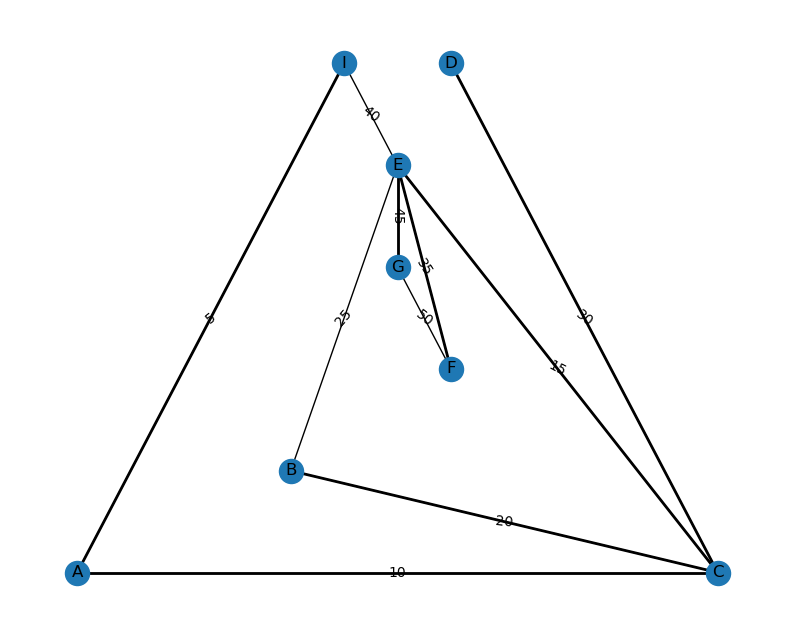

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

def find_shortest_path(graph, start, end):
    """
    Function to find the shortest path and its length from a start node to an end node using Dijkstra's algorithm.
    """
    # Set of nodes included in the shortest path tree
    shortest_path_tree = {start}
    # Initialize labels for each node with infinity
    shortest_path_lengths = {node: float('inf') for node in graph.nodes()}
    shortest_path_lengths[start] = 0  # Distance from start to itself is 0
    # Initialize parent dictionary to keep track of the shortest path tree
    parent_nodes = {node: None for node in graph.nodes()}

    # Fringe nodes are those connected to the tree
    fringe_nodes = {start}

    # Continue until end node is added to the shortest path tree
    while end not in shortest_path_tree:
        # Expand fringe by adding neighbors of nodes in the shortest path tree
        for node in shortest_path_tree:
            fringe_nodes |= {neighbor for neighbor in graph.neighbors(node) if neighbor not in shortest_path_tree}
        
        # Find the node in fringe with the minimum label
        min_label = float('inf')
        min_node = None
        for node in fringe_nodes:
            if shortest_path_lengths[node] < min_label:
                min_label = shortest_path_lengths[node]
                min_node = node

        # Add the node with minimum label to the shortest path tree
        shortest_path_tree.add(min_node)

        # Update labels and parent for neighboring nodes
        for neighbor in graph.neighbors(min_node):
            if neighbor not in shortest_path_tree:
                edge_weight = graph[min_node][neighbor]['weight']
                if min_label + edge_weight < shortest_path_lengths[neighbor]:
                    shortest_path_lengths[neighbor] = min_label + edge_weight
                    parent_nodes[neighbor] = min_node  # Update parent of neighbor to min_node
        
        fringe_nodes.remove(min_node)

    # Construct the set of edges in the shortest path tree
    shortest_path_tree_edges = {(parent_nodes[node], node) for node in parent_nodes if parent_nodes[node] is not None}

    # Return the shortest path length, tree edges, and labels
    return shortest_path_lengths[end], shortest_path_tree_edges, shortest_path_lengths

# Create the graph
graph = nx.Graph()
graph.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edge_list = [
    ("A", "C", {'weight': 10}), ("A", "I", {'weight': 5}), ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}), ("C", "D", {'weight': 30}), ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}), ("E", "F", {'weight': 35}), ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
graph.add_edges_from(edge_list)

# Find the shortest path from 'A' to 'G'
shortest_path_length = {}
shortest_path_tree_edges = set()
shortest_path_length['A'], shortest_path_tree_edges, shortest_path_length_all = find_shortest_path(graph, 'A', 'G')

# Print shortest path lengths to all nodes
print("Length of the shortest path from A to every other node:")
print(shortest_path_length_all)

# Plot the graph with edge labels and shortest path tree edges
plt.figure(figsize=(10, 8))
node_positions = nx.planar_layout(graph)
nx.draw_networkx_edge_labels(graph, node_positions, edge_labels={(u, v): d['weight'] for u, v, d in graph.edges(data=True)}, font_color='black')
nx.draw(graph, pos=node_positions, with_labels=True)

nx.draw_networkx_edges(graph, pos=node_positions, edgelist=shortest_path_tree_edges, edge_color='black', width=2)

plt.show()
